In [100]:
#Course - Data Analysis 
#Project-Integrated Project
#Date Submitted - 7/13/2020
#Author - Atajan Abdyyev

# Step 1. Open the data file and study the general information


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Seems like we have to fix data types as columns are either object, float64. Then I see that we have some Nan values, which will need to be fixed too. We might also happen to have duplicate tables, so that will need to be checked as well. As I study each column, I believe Nan values will not be easy to simply decide what to replace with as Scores and Rating cant be replaced without any consequences. That we will leave for next step. Overall data looks neat. 

<div class="alert alert-block alert-success">

You discover all general problems in the dataset and define the next steps: good start :)
    
</div>

# Step 2. Prepare the data



In [2]:
#Replace the column names (make them lowercase).
data.columns = data.columns.str.lower()
print(data.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [3]:
#Convert the data to the required types.
str_cols = ['name', 'platform', 'genre']
data[str_cols]=data[str_cols].astype(str) #converted 4 columns into string

#data['year_of_release']=pd.to_datetime(data['year_of_release'], format = "%Y") #convert year of release to date format
#data['year_of_release']=data['year_of_release'].astype('Int64')
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce') 

#float_cols =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']
#data[float_cols]=data[float_cols].astype(float)

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce', downcast=None) #this column had a string value so I coerced it
#print(data['year_of_release'].unique())
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Converted columns of (name,platform, genre, rating) to string even if they were to begin with. Doesnt hurt.
Converted column year_of_release to date format of Year only.
Converted columns ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score') to float values as decimals I think are better than integers here
Converted and coerced user_score column to float separately because it had 'tbd' string value and astype() cant convert in this instance. Output is data types of each column inside the table 

<div class="alert alert-block alert-info">
    
<s>Converting year_of_release to datetime, and then selecting a year and converting it to int has the same effect as if you just converted year_of_release to int :) Also your float_cols were already float, so you don't have to process them.</s>
    
</div>

-------fix applied: converted to numeric, had to coerce as we had a nan value in there. commented out float_cols

In [4]:
#If necessary, decide how to deal with missing values:
#Explain why you filled in the missing values as you did or why you decided to leave them blank.
#Why do you think the values are missing? Give possible reasons.
#Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
print(data.isna().sum())

ran= pd.Series(range(1950,2020))
x=(data.groupby(['year_of_release']).groups)
#print(data['year_of_release'].unique())


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Seems like year_of_release, critic_score, user_score, rating are columns with nan values. Decided to leave them all with nan values because we cant judge and assign them average numbers because each game is unique and can either have high or low numbers. We will work with all that we have without dropping anything or changing values.


<div class="alert alert-block alert-success">

A reasonable decision :)
    
</div>

In [5]:
#Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

Output is a data table with the new column total_sales that stores total of all sales for each game

# Step 3. Analyze the data


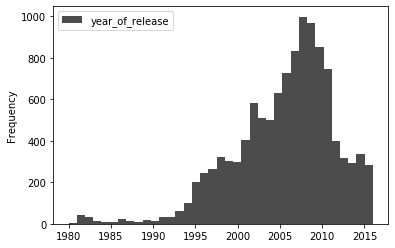

In [6]:
import matplotlib as plt
#Look at how many games were released in different years. Is the data for every period significant?
releases=pd.pivot_table(data, 'year_of_release', 'name')
#releases.hist(bins=200)
releases.plot(kind='hist',bins = data['year_of_release'].nunique(), color=['black'], alpha=0.7)


Seems like 2007, and 2008 were highest game production years. It makes sense how there were less games in the beginning, and it seems like peak season went a bit since 2010. I guess that attributes to economy, on average every 8-10 years we see recession and it affects companies to make games. Also, quality of games went up and we have games that can be played in multiplayer mode which allows players simply keep the game and just buy patches, which was not the case till early 2000s. Also we had more simultaneous different platforms available that were making games.

<div class="alert alert-block alert-success">
A very detailed analysis of the distribution, good! Thank you for providing an explanation for the observations.
</div>

In [7]:
#Look at how sales varied from platform to platform. 

platform_sales = data.groupby('platform')[['total_sales']].sum().sort_values(by='total_sales', ascending = False)
platform_sales[0:5]


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Result is ordered platforms by making total amount of cash across all years. Seems like PS2 is all time winner in making cash. Surprised to see PC to be 10th in the list. More than half of the game platforms are unknown to me. Fun stuff. I decided to take 5 platforms to look into in the table below.

   index  year_of_release platform  total_sales
0      0           2006.0      Wii        82.54
1      2           2008.0      Wii        35.52
2      3           2009.0      Wii        32.77
3      6           2006.0       DS        29.80
4      7           2006.0      Wii        28.91


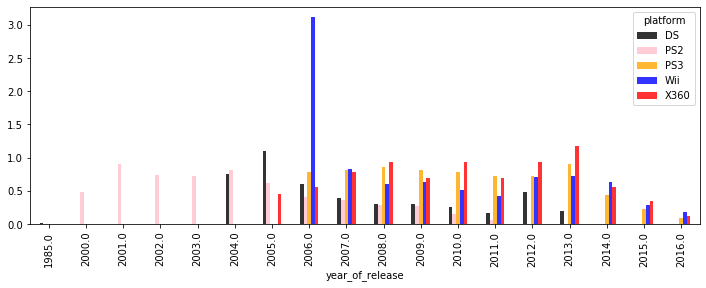

In [8]:
#Choose the platforms with the greatest total sales and build a distribution based on data for each year.
top_platforms_sales=['PS2','X360','PS3','Wii','DS']
year_platform =data[data['platform'].isin(top_platforms_sales)]
year_platform=year_platform[['year_of_release','platform','total_sales']].reset_index()
print(year_platform.head())

distribution=pd.pivot_table(year_platform,index=('year_of_release'),columns=['platform'], values=('total_sales'))

%matplotlib inline
distribution.plot(kind='bar',color=['black','pink','orange','blue','red'], alpha=0.8,figsize=(12, 4))


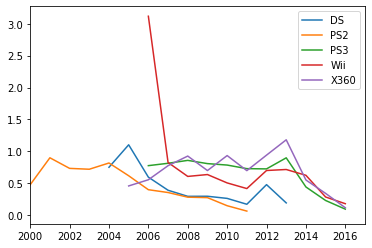

In [9]:
#Choose the platforms with the greatest total sales and build a distribution based on data for each year.
#top_platforms_sales=['PS2','X360','PS3','Wii','DS']
#year_platform =data[data['platform'].isin(top_platforms_sales)]
#year_platform=year_platform[['year_of_release','platform','total_sales']].reset_index()
##print(year_platform.head())

#distribution=pd.pivot_table(year_platform,index=('year_of_release'),columns=['platform'], values=('total_sales'))
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#%matplotlib inline
#distribution.plot(kind='bar',color=['black','pink','orange','blue','red'], alpha=0.8,figsize=(12, 4))
distribution.columns = ['DS','PS2','PS3','Wii','X360']
plt.plot(distribution.index,distribution[:]) # Plotting the line plot
#plt.xticks()
#plt.yticks()
plt.legend(distribution[:])
plt.xlim(2000,2017)
plt.show()


<div class="alert alert-block alert-info">
<s>Ouch, better not to choose yellow on white background, it's very hard to read :) And maybe a line graph would be a better plot type for such data (when we study a dynamics over some period of time).</s> 
</div>

-----fixed. I kept the original just for fun, but also added suggested line graph, and I like it. Visually it is better descriptive and looks way cooler and more understandable. I see how Wii spiked like crazy and went down next year. PS2 and DS totally didnt make to 2015.

Output we see the head of newly created table top_platforms_sales that has only essentail columns for top . Then we see a graph of 5 top money making platforms. Notice how PS2 started making most of money since 2000 and 2007 seems to be its last successful year. Wii Did really well in 2006 as a new unique platform but sorta evened out as years passed by. X360 seems to be the next PS2 as it has been performing quite well since 2006. Seems like X360 replaced PS2. Rest of the platforms are quite static too and all do quite well. 

Seems like P3 and PS2 are 

Float64Index([1984.0, 1985.0, 1988.0, 1989.0, 1990.0, 1996.0, 1999.0, 2002.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0],
             dtype='float64', name='year_of_release')


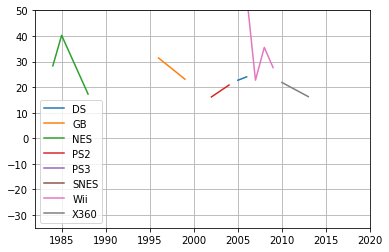

platforms that made money in 2016:  ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']


In [10]:
#Find platforms that used to be popular but now have zero sales. 
av_s=data['total_sales'].mean()
nan=np.nan
early_popular_platforms=data.query('total_sales > @av_s*30').reset_index()

#early_popular_platforms = early_popular_platforms.groupby(['year_of_release','platform']).total_sales.mean()
#early_popular_platforms.plot(kind='bar')
 #= early_popular_platforms.groupby('year_of_release')[['platform']]
early_popular_platforms=pd.pivot_table(early_popular_platforms,index=('year_of_release'),columns=['platform'], values=('total_sales'))

%matplotlib inline
#early_popular_platforms.plot(kind='bar',color=['black','pink','orange','blue','red'], alpha=0.8,figsize=(12, 4))

print(early_popular_platforms.index)
plt.plot(early_popular_platforms.index,early_popular_platforms[:]) # Plotting the line plot
#plt.xticks('years')
#plt.yticks()
plt.xlim(1982,2020)
plt.ylim(-35,50)
plt.legend(early_popular_platforms[:])
plt.grid()
plt.show()
platform_2016=data[data['year_of_release']==2016]
print('platforms that made money in 2016: ',platform_2016['platform'].unique().tolist())

<div class="alert alert-block alert-danger">
    
<s>Let's put some extra work on this graph :) Now it's impossible to distinguish between different platforms, since all are colored in blue. 
    
Also your definition of "popular platform" is unclear. Seems like you filter the data by critics score, i.e. choose only the best games starting from 2012. Why 2012? :) And why critics score instead of total sales?
    
Please plot the data in such manner, so we could clearly see: this is platform A, it had a very high score (sales?) in the year Y1, and almost zero-scores (sales?) in the year Y2.</s>     
    
</div>

changes applied above in a fashion to show all games that made sales for all time where their total sales was 30 times higher than average. That gave us all popular platforms. That way we are not limited to platforms that were before 2010 or any other date(though we can add that too). I decided to choose total earning of 25 times over average because there are platforms that made very low earnings and on average gaming industry has seen extremely high earnings in recent years. This way we were able to see truly popular platforms.

As a result we see that oldest super popular platform was NES. Then it was GB, then PS2, then DS, then Wii, and last seems to be X360. We can see how their earnings got stopped over the years.

You might see that Wii and X360 made some sales in 2016 but because the value of their sales is too low, on the graph it doesnt even show as a line as it is too small and almost insignificant.

<div class="alert alert-block alert-success">
<b>2nd iteration</b>    
    
Great work! Now it's much easier to understand your data :)
    
A small tip: I'd recommend you to take all the data for platforms you choose. Your ``early_popular_platforms`` contains only the games with big total sales. You could select the platforms for these games:
    
    popular_platforms_names = early_popular_platforms.platform.unique()
    
And then to look at the all sales from these platforms:    
    
    data[data.platform.isin(popular_platforms_names)]
    
That would give us an understanding of the whole life of platform: we would see even a years when no game have a total_sales larger than av_s.    
    
</div>

In [11]:
#Find platforms that used to be popular but now have zero sales. 
old_popular_platforms = data.query('year_of_release < 2010').groupby(['platform','year_of_release'])[['total_sales']].mean().nlargest(25,'total_sales')
#print(old_popular_platforms.index.unique())
new_platforms = data.query('year_of_release == 2016')#.groupby(['platform','year_of_release'])[['total_sales']].mean().nlargest(30,'total_sales')
long_lost_popular=set(old_popular_platforms).difference(set(new_platforms))
print(long_lost_popular)


set()


Code above is from recommendation from the bottom of the page. I didnt get any result so I made changes to my initial code in the graph above to display popular platforms and their sales.

Seems like since X360 stopped being popular comparing to 2013 sales, same with PS3. . 

<div class="alert alert-block alert-success">
<b>2nd iteration</b>    
    
Yes, sorry, probably my explanations were a bit confusing!
    
I suggested you find the difference between the sets of platforms' names. You did a great job on selecting old popular and new platforms, and the only thing left to be done is to take a column with names. In the code below you'll find an example of how to make it work :) 
    
</div>

In [16]:
# Reviewer's code

set(old_popular_platforms.reset_index().platform).difference(set(new_platforms.platform))

{'GB', 'GEN', 'N64', 'NES', 'SNES'}

In [17]:
#How long does it generally take for new platforms to appear and old ones to fade?
start=data.groupby('platform').year_of_release.min()
end=data.groupby('platform').year_of_release.max()
avgo=(end-start).mean()
print('Average years for a new platform to appear and disappear:',avgo)

Average years for a new platform to appear and disappear: 7.612903225806452


I grouped data table by platform and took year_of_release minimum and maximum for each platform. THen I subtracted each other and took their average. It appears that every 7.6 years a platform apperas and fades.

<div class="alert alert-block alert-success">
Good, that is correct :)
</div>

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii           2006.0    Sports     41.36   
2         Mario Kart Wii      Wii           2008.0    Racing     15.68   
3      Wii Sports Resort      Wii           2009.0    Sports     15.61   
6  New Super Mario Bros.       DS           2006.0  Platform     11.28   
7               Wii Play      Wii           2006.0      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91  


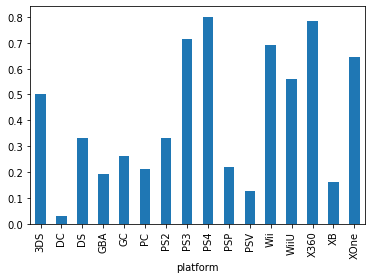

In [18]:
#Determine what period you should take data for. To do so, look at your answers to the previous questions. 
#The data should allow you to build a prognosis for 2017.
#Work only with the data that you've decided is relevant. Disregard the data for previous years.
#Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

leading_sales_platforms=data[data['year_of_release']>2005]
print(leading_sales_platforms.head())
leading_sales_platform = leading_sales_platforms.groupby('platform').total_sales.mean()
leading_sales_platform.plot(kind='bar')


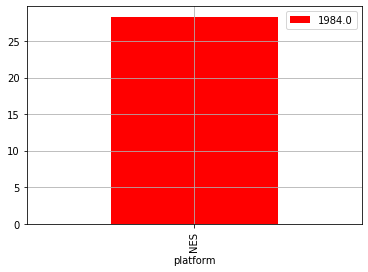

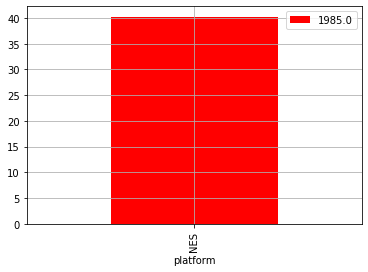

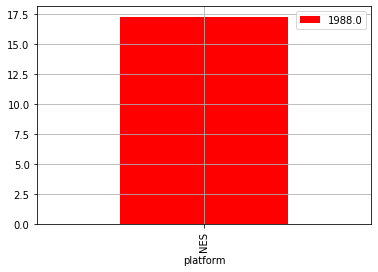

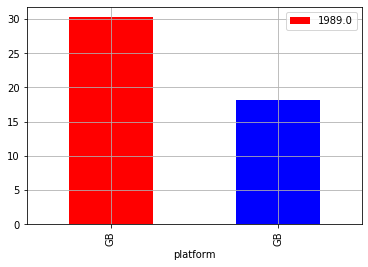

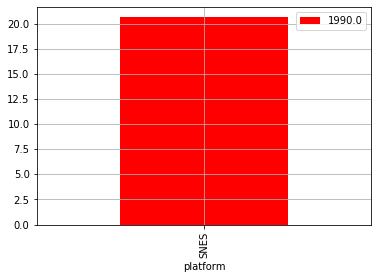

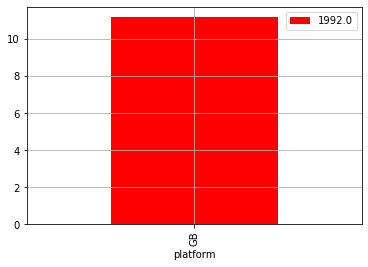

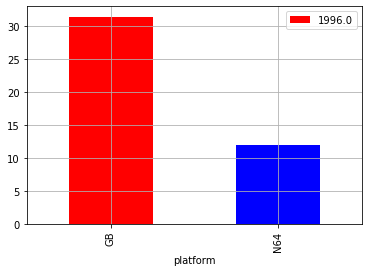

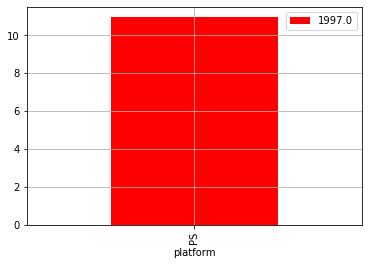

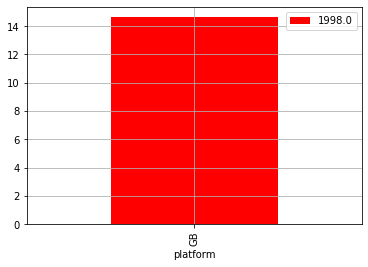

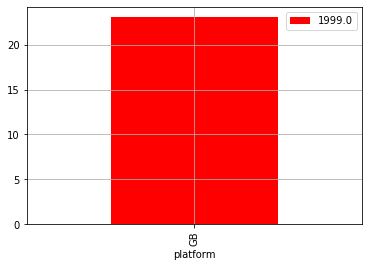

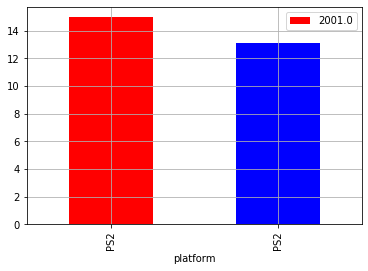

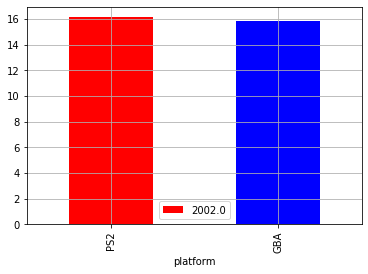

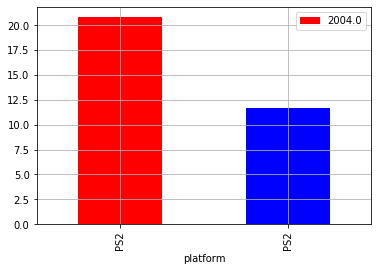

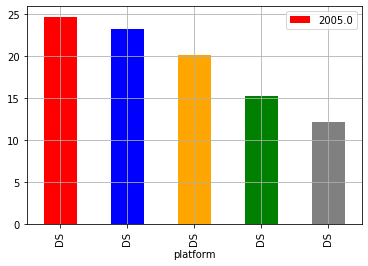

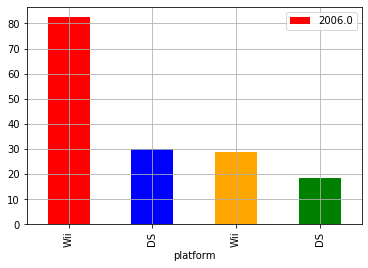

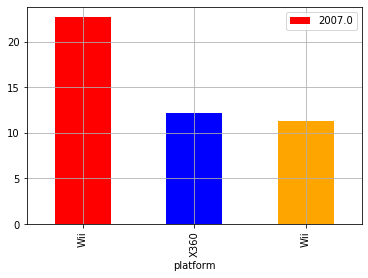

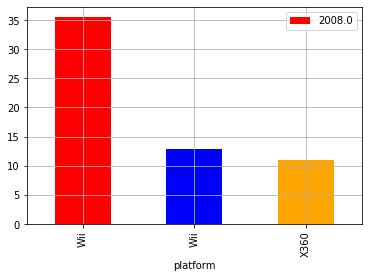

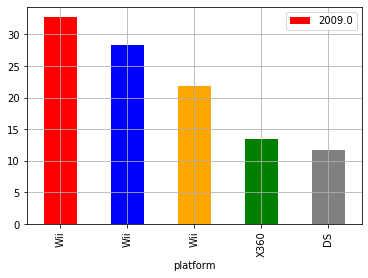

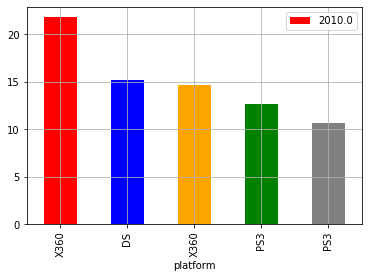

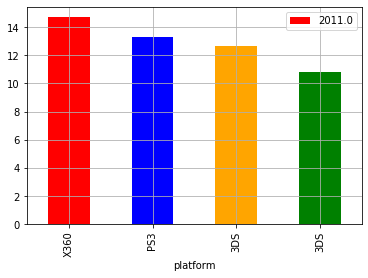

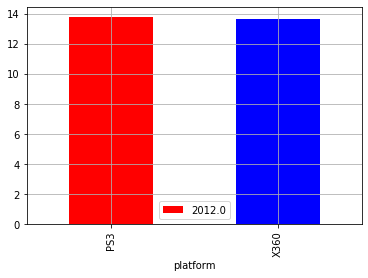

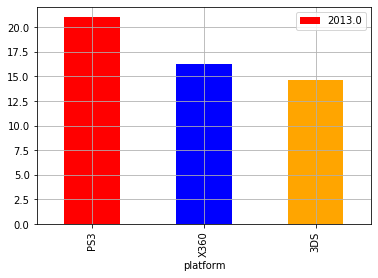

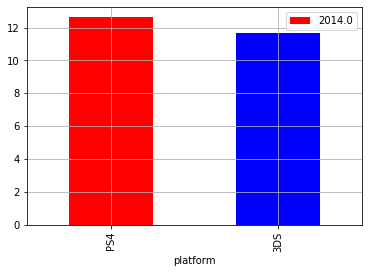

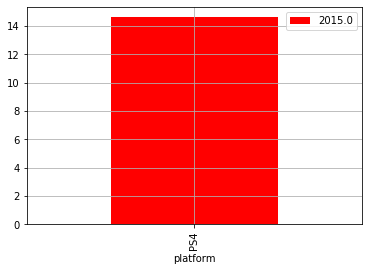

In [19]:
#Determine what period you should take data for. To do so, look at your answers to the previous questions. 
#The data should allow you to build a prognosis for 2017.
#Work only with the data that you've decided is relevant. Disregard the data for previous years.
#Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
av_s=data['total_sales'].mean() # average of all sales

leading_sales_platforms=data.query('total_sales > @av_s*20').reset_index() #chose tables 20x higher than average/kept it just for years purpose, please dont judge too harsh
years=leading_sales_platforms['year_of_release'].sort_values().unique() #successful years where average income was 20x high
#leading_sales_platform = leading_sales_platforms.groupby(['year_of_release','platform'])[['total_sales']].sum()

for x in years:
    lead_year = data.query('total_sales > @av_s*20 and year_of_release ==@x').reset_index() #query on year and total_sales x 20/ which we can totally remove *20 and we will see entire sales
    lead_year = lead_year[['year_of_release','platform','total_sales']] # make the table smaller
    lead_year.plot('platform', 'total_sales',kind='bar', color=['red','blue','orange','green','gray','black']) # plot
    plt.legend(lead_year['year_of_release']) # add year as a legend to see each year
    plt.grid() # add grid
    plt.show() 


Seems like PS4,X360,XOne,PS3 are growing, rest are shrinking. This is based on data starting from 2006.

<div class="alert alert-block alert-danger">
    
<s>Please split this data by years. Now we know how the sales work: they are high (or growing) in the first years and then decreasing. Let's check which of these platforms are dying, which are at the peak currently (so soon will start to fall), and which are just started to grow.
    
Consider, that we expect the platform to live about 7-8 years, so if the sales are high in 2016, but it is its 5th-6th year, we probably will see a decrease in 2017.</s>
</div>

--applied fix above the red box. Kept original just for reference to see average sales for all time. There we can see PS4 and X360 made the most money.

<div class="alert alert-block alert-success">
<b>2nd iteration</b>    
    
A very interesting analysis! Great that you made it interactive, by adding the opportunity to change the threshold. Your conclusions are correct :)  
    
</div>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 10)

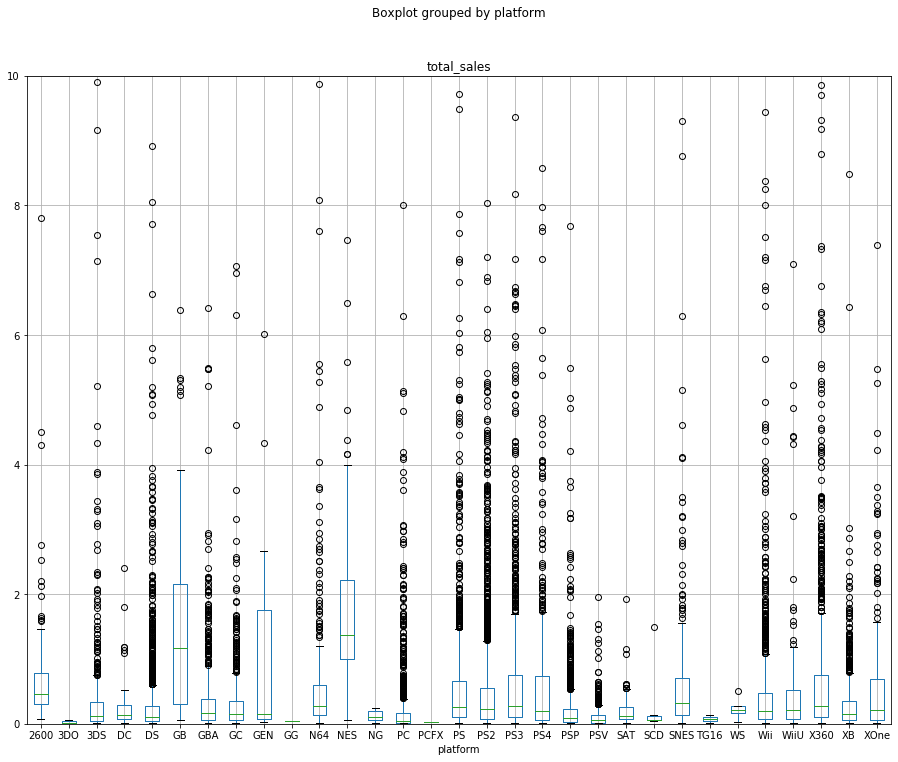

In [25]:
#Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? 
#What about average sales on various platforms? Describe your findings.

#data.set_style("whitegrid") 
import matplotlib.pyplot as plt
leading_sales_platforms.boxplot(by ='platform', column =['total_sales'], grid = True, figsize=(15,12)) 
plt.ylim(0, 10)



<div class="alert alert-block alert-info">
You've already imported pyplot :) It's better to keep all your imports in the first cell, to avoid unnecessary duplication
</div>

Seems like most games start off making money a lot for PS3 platform at around 2 million dollars per game.DC,XB,PSV are among least earners for most of the games they made. I set Ylim to 10 million on purpose to see better where platforms start making money. Some games make much more money and go as high as over 40 million dollars.

<div class="alert alert-block alert-info">
Good, PS3 is clearly a leader. But keep in mind the previous step, we discovered that it's almost non-existent since 2015. Maybe it is not the best choice for "potentially profitable platforms"?
</div>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 5)

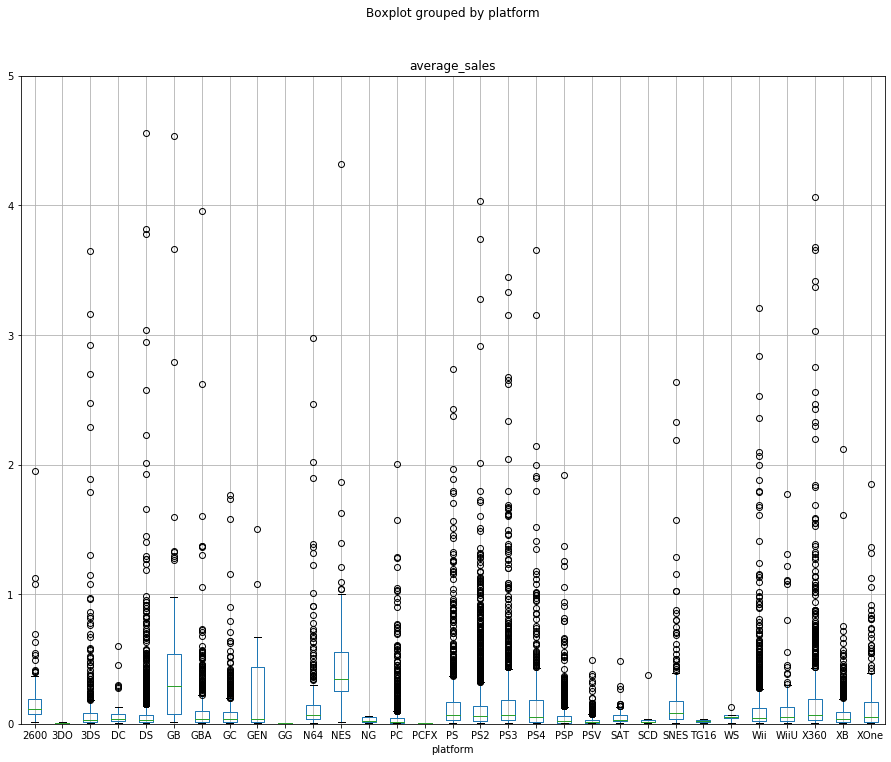

In [26]:
#What about average sales on various platforms? Describe your findings.
import matplotlib.pyplot as plt

cols = ['jp_sales','na_sales','eu_sales','other_sales']
leading_sales_platforms['average_sales'] = leading_sales_platforms[cols].astype(float).mean(axis=1)
#print(leading_sales_platforms.head())
leading_sales_platforms.boxplot(by ='platform', column =['average_sales'], grid = True, figsize=(15,12)) 
plt.ylim(0, 5)


Appears on average PS3,PS4, and X360 make about half a million and are still leading for most games they makes. A bit suprised how on average they are actually making way less than in total sales. Almost twice less for each platform.

<div class="alert alert-block alert-success">
We can expect that average sales by region is lower than total sales :) 
</div>

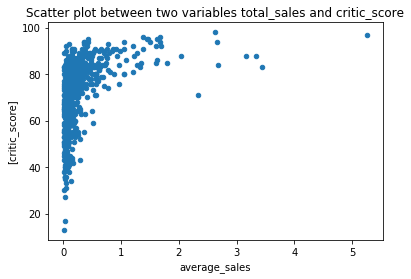

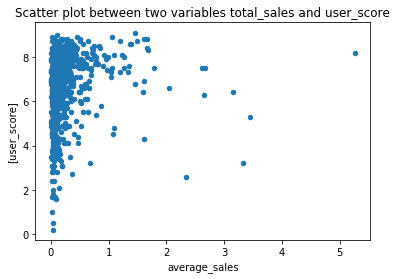

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  average_sales  
0        82.54        20.6350  
1        40.24        

In [27]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
#Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
PS3_platform=leading_sales_platforms[leading_sales_platforms['platform']=='PS3']
PS3_platform.plot.scatter(x='average_sales', y=['critic_score'], title= "Scatter plot between two variables total_sales and critic_score");
PS3_platform.plot.scatter(x='average_sales', y=['user_score'], title= "Scatter plot between two variables total_sales and user_score");
plt.show(block=True);

#print(PS3_platform.head())
print(leading_sales_platforms.head())


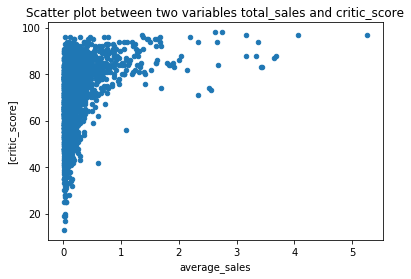

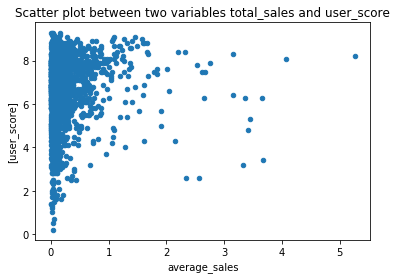

In [28]:
#Keeping your conclusions in mind, compare the sales of the same games on other platforms.
PS3_games=PS3_platform['name']
other_platforms=leading_sales_platforms[leading_sales_platforms['name'].isin(PS3_games)]
other_platforms.plot.scatter(x='average_sales', y=['critic_score'], title= "Scatter plot between two variables total_sales and critic_score");
other_platforms.plot.scatter(x='average_sales', y=['user_score'], title= "Scatter plot between two variables total_sales and user_score");
plt.show(block=False);


It seems like corellation on other than PS3 platform is relatively same to PS3, though there were definetely more sales on other platforms and on other platforms user scores and critic scores were not as tightly corellated as on PS3 platform. We see a lot more sales at average user score rating comparing to PS3 platform. Same with Critic Score, though critic score definetely shows more sales on other than PS3 platforms. STill On average the higher The score, the more sales made. Seems like critics score is slightly better indicator of sales.

<div class="alert alert-block alert-success">
Good work on scores influence analysing :)
</div>

<div class="alert alert-block alert-danger">
    
<s>Let's also calculate the correlation coefficients (method ``.corr()``) and compare the numbers for a clearer understanding</s>
    
</div>

------fix below and added a comment on findings.

In [30]:
other_platforms[['user_score','critic_score','average_sales']].corr()


,user_score,critic_score,average_sales
user_score,1.000000,0.563251,0.093857
critic_score,0.563251,1.000000,0.374212
average_sales,0.093857,0.374212,1.000000


In [31]:
PS3_platform[['user_score','critic_score','total_sales']].corr()


,user_score,critic_score,total_sales
user_score,1.000000,0.629005,0.126691
critic_score,0.629005,1.000000,0.432432
total_sales,0.126691,0.432432,1.000000


First corr() : Seems like corr() gives us a better mathematical values. It clearly shows that for all platforms except PS3, critic score has 37% corellation for average sales vs 8% of user score. 

Second corr(): For PS3 platform only,critic scores makes up 43%, while user score corellates only 12% to the total sales. 

After seeing numerical values, I have to admit that critic scores matter more than user scores, and while visually they seem similar, mathematical values show different results. Much higher difference.

<div class="alert alert-block alert-success">
<b>2nd iteration</b>    
    
Good, some new insights from statistics :) 
    
</div>

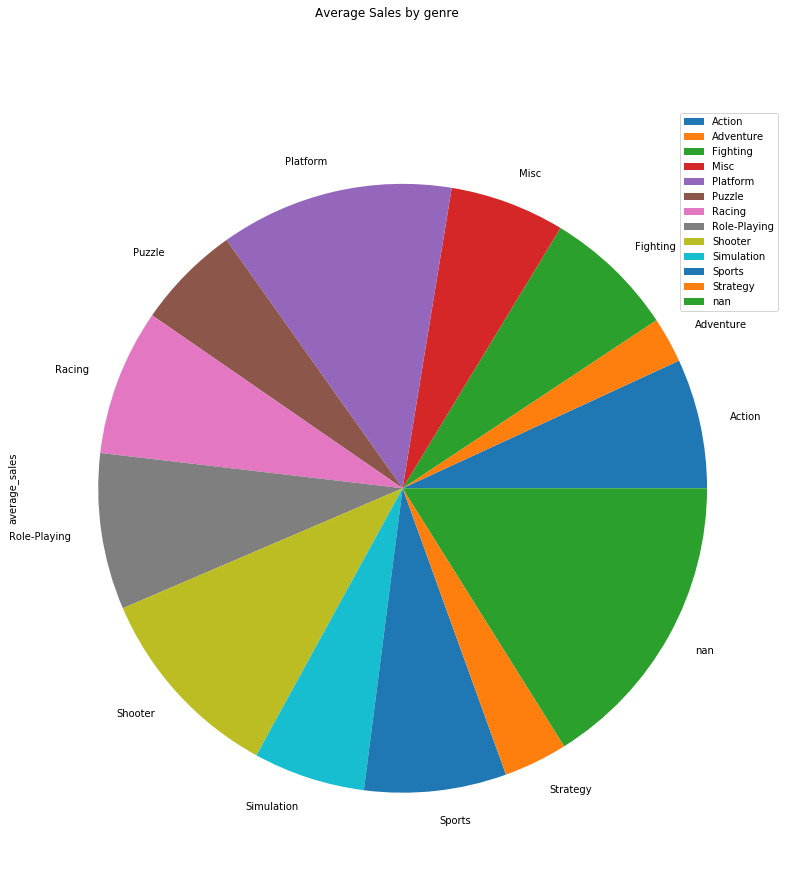

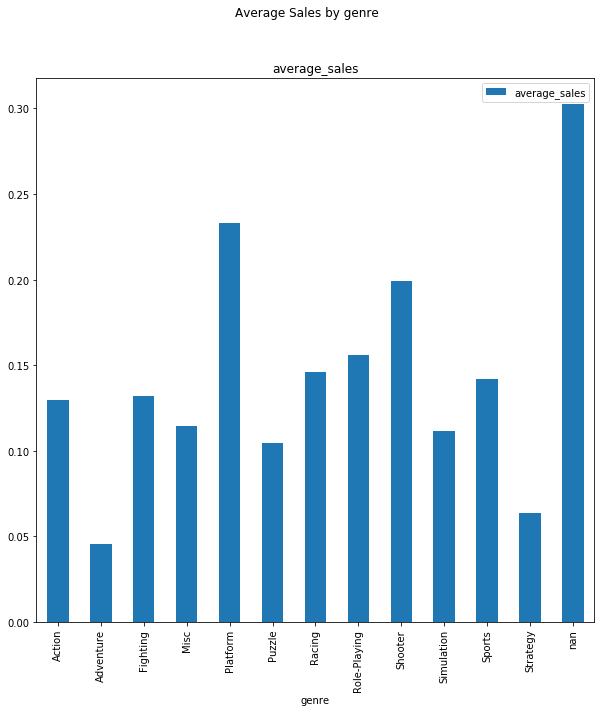

In [32]:
#Take a look at the general distribution of games by genre. 
#What can we say about the most profitable genres? 
#Can you generalize about genres with high and low sales?
genre_earning=pd.pivot_table(leading_sales_platforms,index=('genre'), values=('average_sales'))

%matplotlib inline
genre_earning.plot(kind='pie',legend=True, figsize=(18, 14),subplots=True,title='Average Sales by genre')
genre_earning.plot(kind='bar',legend=True, figsize=(10, 10),subplots=True,title='Average Sales by genre')
#print(leading_sales_platforms.head())

plt.show()

<div class="alert alert-block alert-success">
All good, nice charts and explanations :)
</div>

# Step 4. Create a user profile for each region


In [182]:
#print(leading_sales_platforms.head())
#For each region (NA, EU, JP), determine:
#The top five platforms. Describe variations in their market shares from region to region.


#NA_top_platforms=leading_sales_platforms[leading_sales_platforms['na_sales']].mean()
NA_top_platforms = leading_sales_platforms.groupby('platform').na_sales.mean().nlargest(5).index[:].tolist()
EU_top_platforms = leading_sales_platforms.groupby('platform').eu_sales.mean().nlargest(5).index[:].tolist()
JP_top_platforms = leading_sales_platforms.groupby('platform').jp_sales.mean().nlargest(5).index[:].tolist()
NA_top_platforms = NA_top_platforms
print('Top 5 platforms to make money in North America:',NA_top_platforms)
print('Top 5 platforms to make money in Europe:',EU_top_platforms)
print('Top 5 platforms to make money in Japan:',JP_top_platforms)

Top 5 platforms to make money in North America: ['NES', 'Wii', 'SNES', 'GB', 'X360']
Top 5 platforms to make money in Europe: ['Wii', 'DS', 'PS4', 'PS3', 'GB']
Top 5 platforms to make money in Japan: ['GBA', 'GB', 'DS', 'NES', 'SNES']


Seems like in North America players enjoy games on X360,Wii,XOne,PS3, and PS4. Europe is following North American platforms with exception that they spend more money on newer platforms like PS4, PS3, and X360. Japanese players enjoy platforms that are readily available to carry around like 3DS, WiiU, DS, and PSP. PS3 is only platform in top 5 platforms that Japan and rest of the world enjoy as a top platform.

In [183]:
#The top five genres. Explain the difference.
#"----".join().tolist()
NA_top_genres = leading_sales_platforms.groupby('genre').na_sales.mean().nlargest(5).index[:].tolist()
EU_top_genres = leading_sales_platforms.groupby('genre').eu_sales.mean().nlargest(5).index[:].tolist()
JP_top_genres = leading_sales_platforms.groupby('genre').jp_sales.mean().nlargest(5).index[:].tolist()
NA_top_platforms = NA_top_platforms
print('Top 5 genres to make money in North America:',NA_top_genres)
print('Top 5 genres to make money in Europe:',EU_top_genres)
print('Top 5 genres to make money in Japan:',JP_top_genres)

Top 5 genres to make money in North America: ['Sports', 'Puzzle', 'Platform', 'Misc', 'Shooter']
Top 5 genres to make money in Europe: ['Sports', 'Misc', 'Simulation', 'Racing', 'Role-Playing']
Top 5 genres to make money in Japan: ['Role-Playing', 'Puzzle', 'Platform', 'Simulation', 'Sports']


Seems like Europe and North America has same preference in game genres just as in platforms. Both Regions like SHooter, Platform, SPorts, and Racing games. 

Japan is a bit different. They like Role-Playing games, Platform, Fighting, and some action. That is expected as most of these genres can be played as a single player and dont require platforms that need to be stationed. Since Japan already uses portable platforms to play games, naturally we would see that Japan differes in top game genres compared to Europe and North America.


In [184]:
#Do ESRB ratings affect sales in individual regions?
NA_top_rating = leading_sales_platforms.groupby('rating').na_sales.mean().nlargest(1).index[:].tolist()
EU_top_rating = leading_sales_platforms.groupby('rating').eu_sales.mean().nlargest(1).index[:].tolist()
JP_top_rating = leading_sales_platforms.groupby('rating').jp_sales.mean().nlargest(1).index[:].tolist()
print('Top rating to make money in North America:',NA_top_rating)
print('Top rating to make money in Europe:',EU_top_rating)
print('Top rating to make money in Japan:',JP_top_rating)

Top rating to make money in North America: ['E']
Top rating to make money in Europe: ['E']
Top rating to make money in Japan: ['E']


Seems like in North America and Europe on average M - Mature genre games make the most money, meaning most games that make money are for adults and content can include blood, gore, violence, and other adult themed content. Knowing that shooters are top games, we can see it corellates to rating of games. 

In Japan E rating is for Everyone, meaning their gamers are of all ages, gender, and backgrounds. It explains that top game in Japan is ROle-Playing where anyone can act as anyone else and these games on average have no adult content. This data corellates too. It seems like Japanese gamers culture is very much different than European and North American when it comes to games.

ESRB ratings do affect regions, one will least likely make a lot of money with games of rating E in Europe and in North America as they would in Japan. Same way in Japan, games with ratings of M would make less money compared to rating of E.

<div class="alert alert-block alert-success">
Interesting insights! Good work on regions comparison, no questions here :)
</div>

# Step 5. Test the following hypotheses:


In [185]:

#—Average user ratings of the Xbox One and PC platforms are the same.
xone_rating = data[data['platform']=='XOne']['user_score'].reset_index().dropna()
#print(xone_rating)
pc_rating = data[data['platform']=='PC']['user_score'].reset_index().dropna()


alpha = 0.05

res = st.ttest_ind(xone_rating.user_score,pc_rating.user_score)

print('p-value:', res.pvalue)# your code: print the p-value you get)

if (res.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.3896435533548819e-05
We reject the null hypothesis


P-value is smaller than 0.05 and that means that probability of PC platform and XOne platform to be equal is belo 5%, thus we reject our null hypothesis that two platforms are equal. The significance level we set is 5%.

In [186]:
#—Average user ratings for the Action and Sports genres are different.
action_rating = data[data['genre']=='Action']['user_score'].reset_index().dropna()
#print(action_rating)
sports_rating = data[data['genre']=='Sports']['user_score'].reset_index().dropna()


alpha = 0.05

res = st.ttest_ind(sports_rating.user_score,action_rating.user_score)

print('p-value:', res.pvalue)

if (res.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.10406951359049141
We can't reject the null hypothesis


Seems like we can't reject null hypothesis between Action and Sports genres having equal user_score. The value is above 5%. Probability of values being equal is around 10% based on p-value. The significance level we set is 5%.

<div class="alert alert-block alert-success">
Great, your tests and conclusions on them are correct
</div>

# Step 6. Write a general conclusion


#Format: Complete the task in the Jupyter Notebook.
#Insert the programming code in the code cells and text explanations in the markdown cells. 
#Apply formatting and add headings.
As a general conclusion we found following:
1) Probability of XONe and PC platforms having same user_score is too small, below5 %m , making it almost impossible to be equal.
2) Probability of Sports and Action genres is about 10% which we assume is more likely to happen for two genres to equal in user_score ratings.
3) Europe and North America have same top 5 platforms and both continents enjoy Mature content games (top game being shooter genre).
4) Japan unlike Europe and North America uses different gaming platforms and enjoy content for Everybody (top game genre is Role-playing).
5) For a company that makes games they have to take into consideration what type of genre they wat to make for either of regions based on observations in part 3 and 4.
6) Top 3 genres overall since 2006 are Shooter, Platform, and Sports games.
7) Seems like critics scores affect sales of games a lot, but users scores affect on average better than critics. That is probably because if your friend has a game they say is good, you would get the same game too. Doubt people take listening to ciritics too seriously and rather just see what other players say about the game. Hence the result for low scoring games to be sold better in a graph for user scores.
8) Appears on average PS3,PS4, and X360 make about half a million and are still leading for most games they makes. 
9) Seems like most games start off making money a lot for PS3 platform at around 2 million dollars per game.DC,XB,PSV are among least earners for most of the games they made. 
10) Seems like PS4,X360,XOne,PS3 are growing, rest are shrinking. This is based on data starting from 2006.
11) PS2 started making most of money since 2000 and 2007 seems to be its last successful year. Wii Did really well in 2006 as a new unique platform but sorta evened out as years passed by. X360 seems to be the next PS2 as it has been performing quite well since 2006. Seems like X360 replaced PS2. 
12) Average span for a new platform to appear and go awway is about 7.5 years.
13) Seems like 2007, and 2008 were highest game production years.Most likely because we still had old platforms like PS2 around making new games, and new platforms like PS3, and Wii appearing in 2006 affect game production for the new platform.
14) 

<div class="alert alert-block alert-success">
<b>2nd iteration</b>    
    
A very detailed final conclusion :) 
    
</div>

########SIDE REQUEST: #Find platforms that used to be popular but now have zero sales. Can you please suggest a pseudo code if you wanted to get list of platforms no longer popular? I tried many ways but kept getting errors and got lost in ideas how I'd display it besides the graph I have.

<div class="alert alert-block alert-info">
    
First, I would group the table by platforms and year, calculate the mean total sales, and search for the platforms with the big mean_total_sales and year less than 2010 (let's name the result ``old_popular_platforms``). 
    
Second, I'd select all the platforms that have any sales in 2016 (``new_platforms``).
    
Finally, I'd find th platforms that are in ``old_popular_platforms``, but not in ``new_platforms``(e.g. with this code: ``set(old_popular_platforms).difference(set(new_platforms))``).
    
Would be easier if you keep the code you trying to run. Then I could help you to find the reason it s not working, and to solve the problem :)    
    
</div>